In [1]:
using Pkg
Pkg.activate("/global/u2/a/aramreye/RamirezReyes_Yang_2020_SpontaneousCyclogenesis")
using PyPlot
using PyCall
using Base64
using Printf
using NCDatasets
using Statistics
using AvailablePotentialEnergyFramework
using JLD

 Activating environment at `/global/u2/a/aramreye/RamirezReyes_Yang_2020_SpontaneousCyclogenesis/Project.toml`


In [2]:
function filter_n_times(x,smooth_time,n)
	if n <= 1
		return filter_array_time(x,smooth_time,3)
	else
        for ii in n:-1:1
 	          x=filter_array_time(x,smooth_time,3)
         end
	end
           x
end

filter_n_times (generic function with 1 method)

In [3]:
tkr = pyimport("matplotlib.ticker")# import FormatStrFormatter

PyObject <module 'matplotlib.ticker' from '/usr/common/software/python/3.7-anaconda-2019.10/lib/python3.7/site-packages/matplotlib/ticker.py'>

In [4]:
data_dir = "$(ENV["SCRATCH"])/for_postprocessing/largencfiles/"
output_dir = "/global/u2/a/aramreye/RamirezReyes_Yang_2020_SpontaneousCyclogenesis/plotsandanimations/"

"/global/u2/a/aramreye/RamirezReyes_Yang_2020_SpontaneousCyclogenesis/plotsandanimations/"

In [5]:
function get_timeseries!(buf1,buf2,buf3,file_path)
 	(min_pres,max_speed) = Dataset(file_path) do ds
        NCDatasets.load!(ds["PSFC"].var,buf1,:,:,:)
        min_pres = dropdims(minimum(buf1,dims=(1,2)),dims=(1,2))
        NCDatasets.load!(ds["USFC"].var,buf1,:,:,:)
        NCDatasets.load!(ds["VSFC"].var,buf2,:,:,:)
        #pres = variable(ds,"PSFC")[:,:,:] :: Array{Float32,3}
        #u = variable(ds,"USFC")[:,:,:] :: Array{Float32,3}
        #v = variable(ds,"VSFC")[:,:,:] :: Array{Float32,3}
        buf3 .= hypot.(buf1,buf2)
        #min_pres = dropdims(minimum(pres,dims=(1,2)),dims=(1,2))
        max_speed = dropdims(maximum(buf3,dims=(1,2)),dims=(1,2))
        (min_pres,max_speed)
    end
    return (min_pres,max_speed)
end

get_timeseries! (generic function with 1 method)

In [6]:
buf1_large = Array{Float32,3}(undef,512,512,2400)
buf2_large = Array{Float32,3}(undef,512,512,2400)
buf3_large = Array{Float32,3}(undef,512,512,2400);

In [7]:
pres_control,sp_control = get_timeseries!(buf1_large,buf2_large,buf3_large,joinpath(data_dir,"f5e-4_2km_1000km_control_2d.nc"))
pres_homoSfc,sp_homoSfc = get_timeseries!(buf1_large,buf2_large,buf3_large,joinpath(data_dir,"f5e-4_2km_1000km_homoSfc_2d.nc"))
pres_homoRad,sp_homoRad = get_timeseries!(buf1_large,buf2_large,buf3_large,joinpath(data_dir,"f5e-4_2km_1000km_homoRad_2d.nc"))
pres_homoRad_homoSfc,sp_homoRad_homoSfc = get_timeseries!(buf1_large,buf2_large,buf3_large,joinpath(data_dir,"f5e-4_2km_1000km_homoRad_homoSfc_2d.nc"))

(Float32[1002.4053, 1002.3763, 1002.3768, 1002.3826, 1002.3848, 1002.3809, 1002.3838, 1002.3885, 1002.3896, 1002.3885  …  958.5595, 959.7258, 960.2651, 960.4822, 959.5681, 959.5955, 960.6569, 961.3692, 961.7292, 961.924], Float32[0.8592346, 2.8434923, 3.3858569, 3.8149393, 4.7621903, 4.9759226, 5.1496797, 5.738902, 5.788416, 6.041086  …  41.663433, 40.499348, 38.079777, 38.514713, 42.61925, 39.706886, 38.19187, 37.35845, 35.782967, 36.598984])

In [9]:
variance_minpres_control = std(pres_control[1200:end])
variance_minpres_homoRad = std(pres_homoRad[1200:end])
variance_minpres_homoSfc = std(pres_homoSfc[1200:end])
variance_minpres_homoRad_homoSfc = std(pres_homoRad_homoSfc[1200:end])

variance_maxspeed_control = std(sp_control[1200:end])
variance_maxspeed_homoRad = std(sp_homoRad[1200:end])
variance_maxspeed_homoSfc = std(sp_homoSfc[1200:end])
variance_maxspeed_homoRad_homoSfc = std(sp_homoRad_homoSfc[1200:end])

6.276391f0

In [10]:
mean_minpres_control = mean(pres_control[1200:end])
mean_minpres_homoRad = mean(pres_homoRad[1200:end])
mean_minpres_homoSfc = mean(pres_homoSfc[1200:end])
mean_minpres_homoRad_homoSfc = mean(pres_homoRad_homoSfc[1200:end])

mean_maxspeed_control = mean(sp_control[1200:end])
mean_maxspeed_homoRad = mean(sp_homoRad[1200:end])
mean_maxspeed_homoSfc = mean(sp_homoSfc[1200:end])
mean_maxspeed_homoRad_homoSfc = mean(sp_homoRad_homoSfc[1200:end])

40.192318f0

In [12]:
@show variance_minpres_control/mean_minpres_control
@show variance_minpres_homoRad/mean_minpres_homoRad
@show variance_minpres_homoSfc/mean_minpres_homoSfc
@show variance_minpres_homoRad_homoSfc/mean_minpres_homoRad_homoSfc

variance_minpres_control / mean_minpres_control = 0.008609973f0
variance_minpres_homoRad / mean_minpres_homoRad = 0.0067590103f0
variance_minpres_homoSfc / mean_minpres_homoSfc = 0.0060509746f0
variance_minpres_homoRad_homoSfc / mean_minpres_homoRad_homoSfc = 0.006660585f0


0.006660585f0

In [13]:
@show variance_maxspeed_control/mean_maxspeed_control
@show variance_maxspeed_homoRad/mean_maxspeed_homoRad
@show variance_maxspeed_homoSfc/mean_maxspeed_homoSfc
@show variance_maxspeed_homoRad_homoSfc/mean_maxspeed_homoRad_homoSfc

variance_maxspeed_control / mean_maxspeed_control = 0.12655924f0
variance_maxspeed_homoRad / mean_maxspeed_homoRad = 0.074465014f0
variance_maxspeed_homoSfc / mean_maxspeed_homoSfc = 0.15011087f0
variance_maxspeed_homoRad_homoSfc / mean_maxspeed_homoRad_homoSfc = 0.15615897f0


0.15615897f0

In [9]:
times = Dataset(joinpath(data_dir,"f5e-4_2km_1000km_control_2d.nc")) do ds
	variable(ds,"time")[:]
    end;

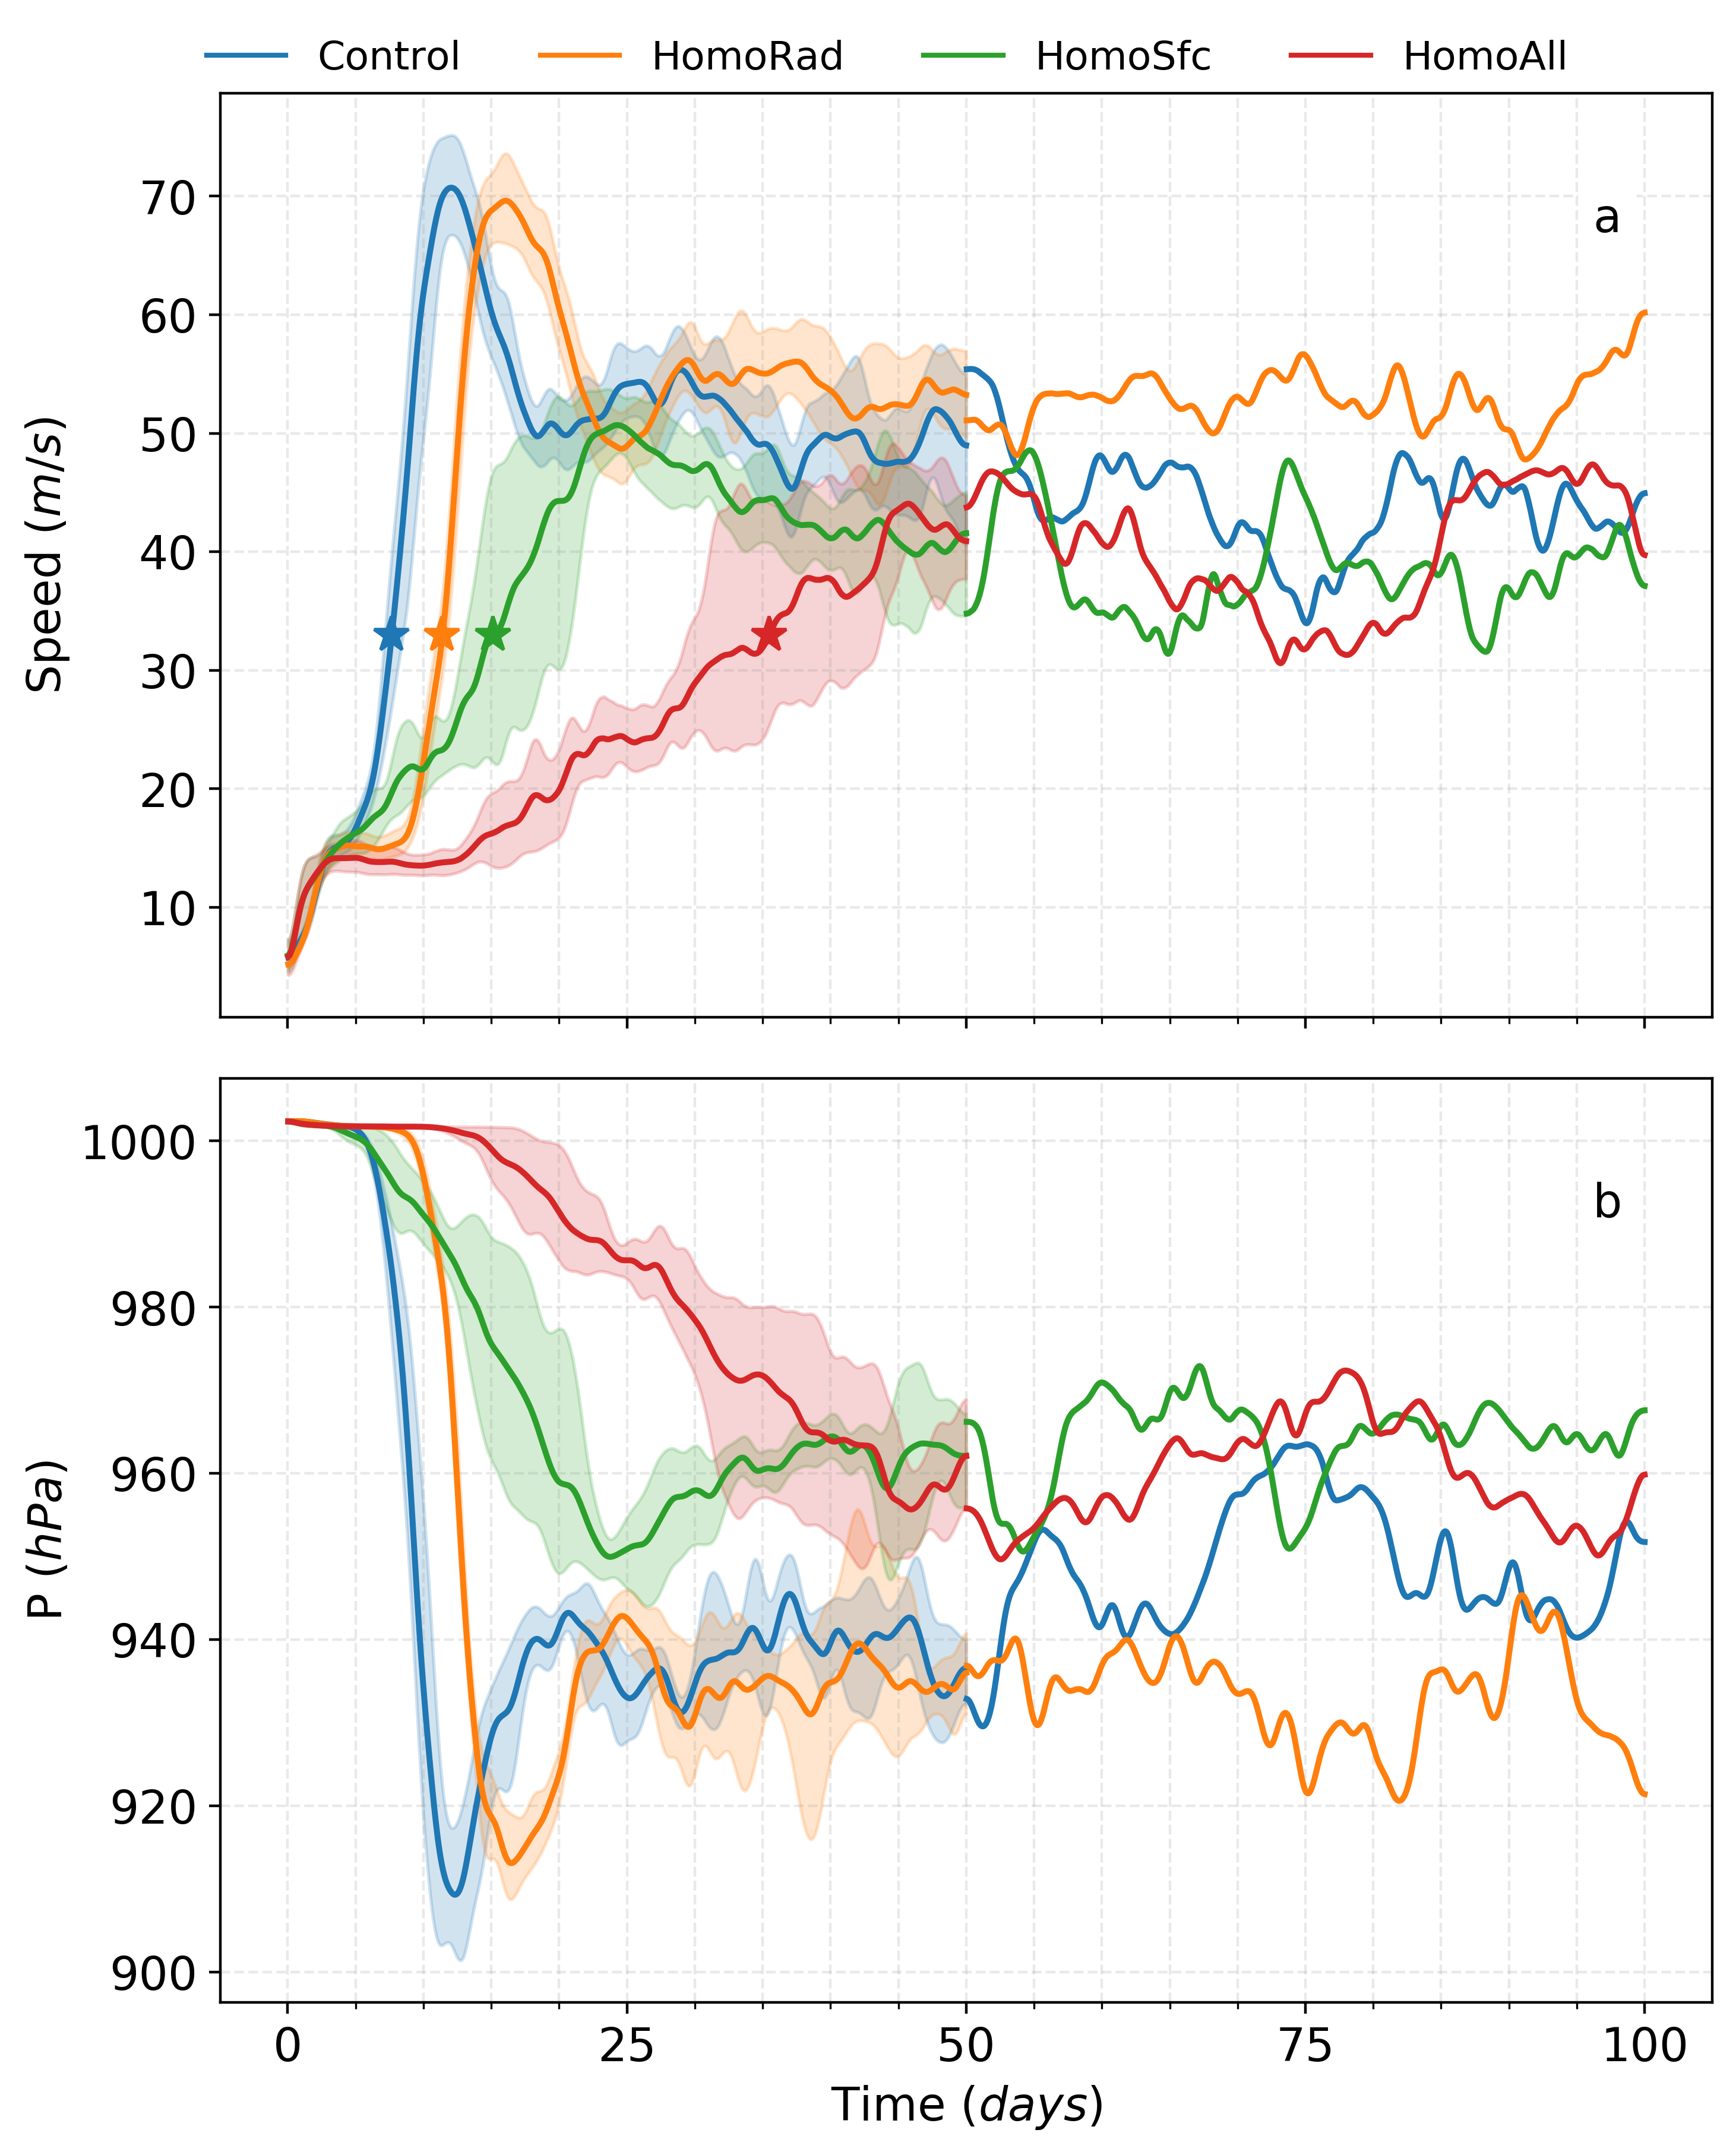

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

In [60]:
PyPlot.matplotlib.rc("font", family="sans-serif",size=14)
time_smooth = 21

times_to_smooth=3

ribbon_alpha = 0.2
##########
fig, ax = plt.subplots(2,1,sharex=true,figsize=(2*3.74,2*4.5),dpi=400)

p1, = ax[1].plot(times[1:1200],line_sp_control[1:1200],label="Control")
ax[1].plot(times[1201:end],line_sp_control[1201:end],label="_nolegend_",color = p1.get_color())
p2 = ax[1].fill_between(times[1:end÷2],filter_n_times(sp_control_ensemble_min,time_smooth,times_to_smooth),filter_n_times(sp_control_ensemble_max,time_smooth,times_to_smooth),label="_nolegend_",alpha=ribbon_alpha,facecolor=p1.get_color(),edgecolor=p1.get_color())

p3, = ax[1].plot(times[1:1200],line_sp_homoRad[1:1200],label="HomoRad")
ax[1].plot(times[1201:end],line_sp_homoRad[1201:end],label="_nolegend_",color = p3.get_color())
p4 = ax[1].fill_between(times[1:end÷2],filter_n_times(sp_homoRad_ensemble_min,time_smooth,times_to_smooth),filter_n_times(sp_homoRad_ensemble_max,time_smooth,times_to_smooth),label="_nolegend_",alpha=ribbon_alpha,facecolor=p3.get_color(),edgecolor=p3.get_color())

sp_homoSfc_ensemble_min[1180:1200] .= 33.6
sp_homoSfc_ensemble_min[1194] = 36.6
sp_homoSfc_ensemble_min[1195] = 36.6
sp_homoSfc_ensemble_min[1196] = 36.6
sp_homoSfc_ensemble_min[1197] = 36.6
sp_homoSfc_ensemble_min[1198] = 36.6
sp_homoSfc_ensemble_min[1199] = 36
sp_homoSfc_ensemble_min[1200] = 30
#sp_homoSfc_ensemble_min[1170:1200] .= 30

p5, = ax[1].plot(times[1:1200],line_sp_homoSfc[1:1200],label="HomoSfc")
ax[1].plot(times[1201:end],line_sp_homoSfc[1201:end],label="_nolegend_",color = p5.get_color())
p6 = ax[1].fill_between(times[1:end÷2],filter_n_times(sp_homoSfc_ensemble_min,time_smooth,times_to_smooth)[1:1200],filter_n_times(sp_homoSfc_ensemble_max,time_smooth,times_to_smooth),label="_nolegend_",alpha=ribbon_alpha,facecolor=p5.get_color(),edgecolor=p5.get_color())
#ax[1].plot(times,sp_homoSfc)

p7, = ax[1].plot(times[1:1200],line_sp_homoRad_homoSfc[1:1200],label="HomoAll")
ax[1].plot(times[1201:end],line_sp_homoRad_homoSfc[1201:end],label="_nolegend_",color = p7.get_color())
p8 = ax[1].fill_between(times[1:end÷2],filter_n_times(sp_homoRad_homoSfc_ensemble_min,time_smooth,times_to_smooth),filter_n_times(sp_homoRad_homoSfc_ensemble_max,time_smooth,times_to_smooth),label="_nolegend_",alpha=ribbon_alpha,facecolor=p7.get_color(),edgecolor=p7.get_color())
ax[1].set_ylabel(string("Speed ",L"(m/s)"))

###
ax[1].plot(times[genesis_control],[33],"*",markersize=11,color=p1.get_color())
ax[1].plot(times[genesis_homoRad],[33],"*",markersize=11,color=p3.get_color())	
ax[1].plot(times[genesis_homoSfc],[33],"*",markersize=11,color=p5.get_color())	
ax[1].plot(times[genesis_homoRad_homoSfc],[33],"*",markersize=11,color=p7.get_color())	

#######################

p9, = ax[2].plot(times[1:1200],line_pres_control[1:1200],label="Control")
ax[2].plot(times[1201:end],line_pres_control[1201:end],label="_nolegend_",color = p1.get_color())
p10 = ax[2].fill_between(times[1:end÷2],filter_n_times(pres_control_ensemble_min,time_smooth,times_to_smooth),filter_n_times(pres_control_ensemble_max,time_smooth,times_to_smooth),label="_nolegend_",alpha=ribbon_alpha,facecolor=p1.get_color(),edgecolor=p1.get_color())

p11, = ax[2].plot(times[1:1200],line_pres_homoRad[1:1200],label="HomoRad")
ax[2].plot(times[1201:end],line_pres_homoRad[1201:end],label="_nolegend_",color = p3.get_color())
p12 = ax[2].fill_between(times[1:end÷2],filter_n_times(pres_homoRad_ensemble_min,time_smooth,times_to_smooth),filter_n_times(pres_homoRad_ensemble_max,time_smooth,times_to_smooth),label="_nolegend_",alpha=ribbon_alpha,facecolor=p3.get_color(),edgecolor=p3.get_color())

p13, = ax[2].plot(times[1:1200],line_pres_homoSfc[1:1200],label="HomoSfc")
ax[2].plot(times[1201:end],line_pres_homoSfc[1201:end],label="_nolegend_",color = p5.get_color())
p14 = ax[2].fill_between(times[1:end÷2],filter_n_times(pres_homoSfc_ensemble_min,time_smooth,times_to_smooth),filter_n_times(pres_homoSfc_ensemble_max,time_smooth,times_to_smooth),label="_nolegend_",alpha=ribbon_alpha,facecolor=p5.get_color(),edgecolor=p5.get_color())


p15, = ax[2].plot(times[1:1200],line_pres_homoRad_homoSfc[1:1200],label="HomoAll")
ax[2].plot(times[1201:end],line_pres_homoRad_homoSfc[1201:end],label="_nolegend_",color = p7.get_color())
p16 = ax[2].fill_between(times[1:end÷2],filter_n_times(pres_homoRad_homoSfc_ensemble_min,time_smooth,times_to_smooth),filter_n_times(pres_homoRad_homoSfc_ensemble_max,time_smooth,times_to_smooth),label="_nolegend_",alpha=ribbon_alpha,facecolor=p7.get_color(),edgecolor=p7.get_color())


	
ax[2].set_ylabel(string("P ",L"(hPa)"))

#######################
ax[2].set_xlabel(string("Time ",L"(days)"))
ax[1].yaxis.set_label_coords(-0.1,0.5)
ax[1].minorticks_on()
ax[1].grid(b=true,which="both",color="xkcd:gray", linestyle="--",alpha=0.3)
ax[2].yaxis.set_label_coords(-0.1,0.5)
ax[1].annotate("a", xy=(0.92, 0.85), xycoords="axes fraction",backgroundcolor="white")
ax[2].annotate("b", xy=(0.92, 0.85), xycoords="axes fraction",backgroundcolor="white")
plt.tight_layout()
ax[1].legend(loc = (-0.02, 1), ncol=4 ,frameon=false,fontsize=12)
lw = 1.8
[ln.set_linewidth(lw) for i in 1:length(ax) for ln in ax[i].lines ]
ax[1].xaxis.set_minor_locator(tkr.MultipleLocator(5))
ax[1].xaxis.set_major_locator(tkr.MultipleLocator(25))
ax[1].yaxis.set_minor_locator(plt.NullLocator())
ax[1].grid(b=true,which="both",color="xkcd:gray", linestyle="--",alpha=0.2)
ax[2].xaxis.set_minor_locator(tkr.MultipleLocator(5))
ax[2].grid(b=true,which="both",color="xkcd:gray", linestyle="--",alpha=0.2)
savefig(joinpath(output_dir,"time_comparisons_mechanism_denial.png"), bbox_inches="tight")
savefig(joinpath(output_dir,"time_comparisons_mechanism_denial.eps"), bbox_inches="tight")
savefig(joinpath(output_dir,"time_comparisons_mechanism_denial.pdf"), bbox_inches="tight")

In [24]:
sp_homoSfc[1200]

36.36015f0

In [25]:
sp_homoSfc[1201]

41.213608f0

In [26]:
sp_homoSfc[1202]

38.300453f0

In [33]:
sp_homoSfc_ensemble_min[1200]

36.36015f0